In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install xgboost


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
data = pd.read_csv("survey.csv")

In [4]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [6]:
data.shape

(1259, 27)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [8]:
data.drop(['Country', 'state', 'Timestamp', 'comments'], axis = 1, inplace = True)

In [9]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [10]:
data['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [11]:
data['self_employed'].fillna('No', inplace = True)

In [12]:
data['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [13]:
data['work_interfere'].fillna('N/A', inplace = True)

<AxesSubplot:>

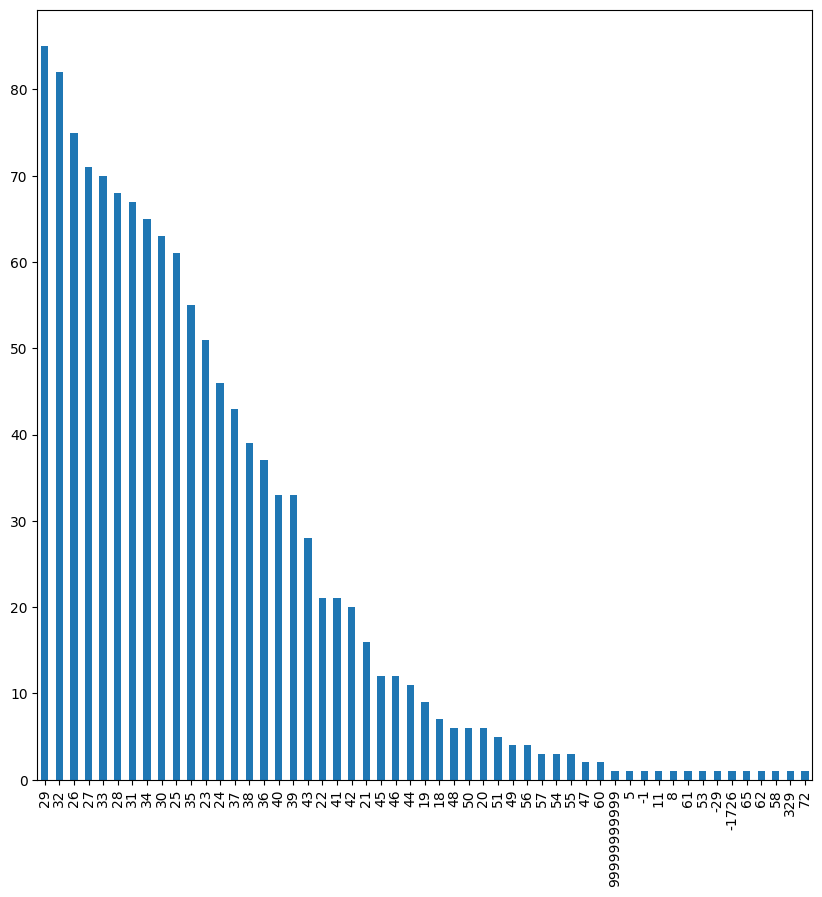

In [14]:
data['Age'].value_counts().plot(kind = 'bar', figsize=(10,10))

In [15]:
data.drop(data[(data['Age'] > 80) | (data['Age'] < 18)].index, inplace = True)

<AxesSubplot:>

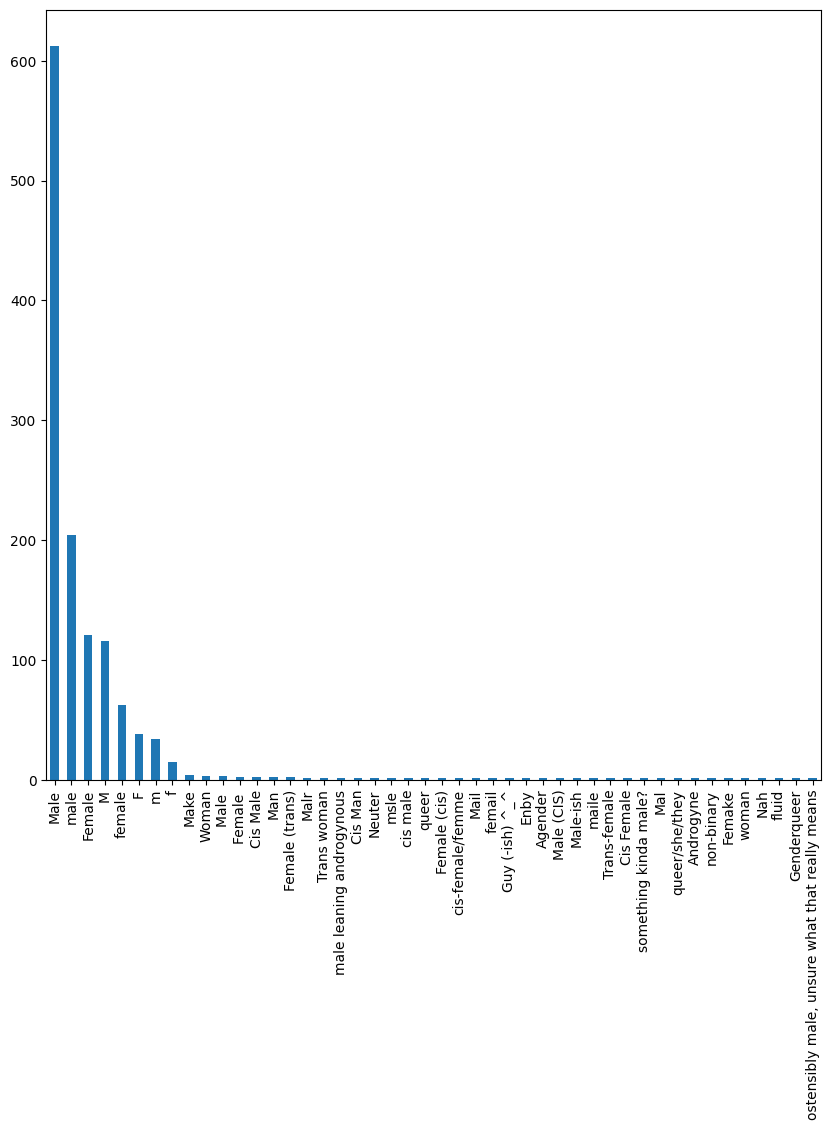

In [16]:
data['Gender'].value_counts().plot(kind = 'bar', figsize=(10,10))

In [17]:
data['Gender'].replace(['Male', 'male','M','m','Make','Cis Male','Man','Malr','Cis Man','msle','cis male'
                      'Mail','Guy (-ish) ^_^','Male (CIS)','Male-ish','maile','Mal', 'Mail', 'Male ', 'cis male'], 'Male', inplace = True)
data['Gender'].replace(['Female', 'female','F','f','Woman','Female (cis)','cis-female/femme','femail','Cis Female','Femake',
                        'woman','Female '], 'Female', inplace = True)
data['Gender'].replace(['Female (trans)','Trans woman','male leaning androgynous','Neuter','queer','Guy (-ish) ^_^',
                        'Enby','Agender','Trans-female','something kinda male?','queer/she/they', 'Androgyne', 'non-binary',
                        'Nah','fluid','Genderqueer','ostensibly male, unsure what that really means'], 'Non-binary', inplace = True)

<AxesSubplot:>

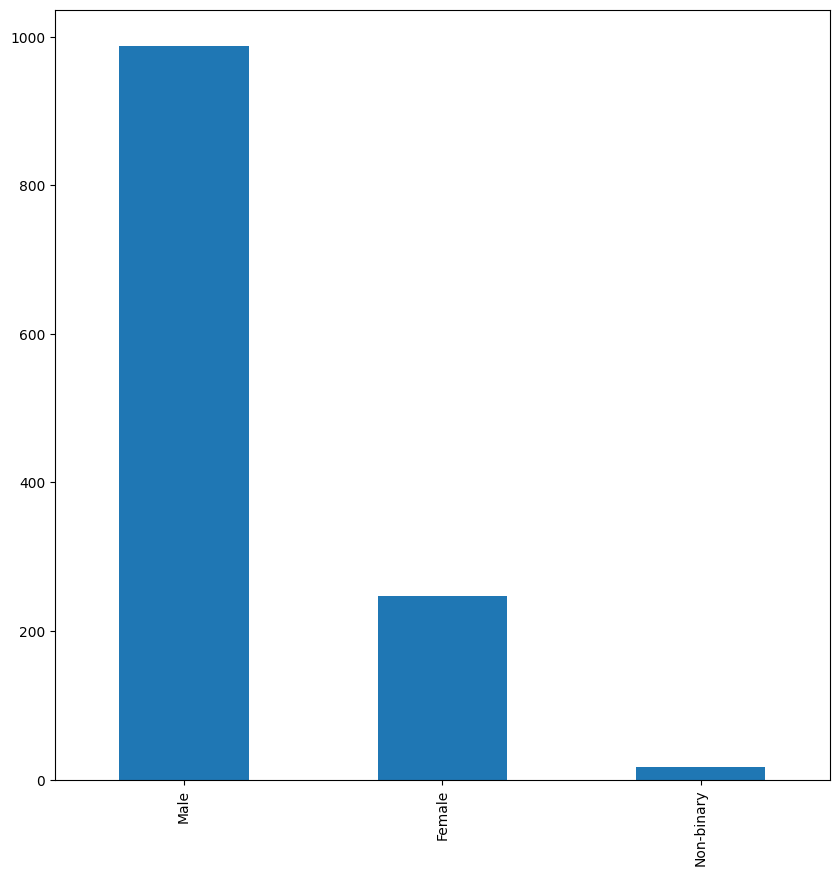

In [18]:
data['Gender'].value_counts().plot(kind = 'bar', figsize=(10,10))

C:\Users\Vivek\AppData\Local\Temp\ipykernel_21036\3040262234.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Age'])


Text(0.5, 0, 'Age')

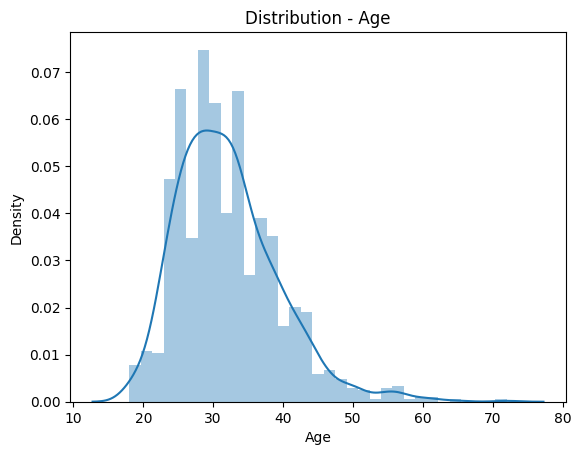

In [19]:
sb.distplot(data['Age'])
plt.title("Distribution - Age")
plt.xlabel("Age")

ValueError: Cannot use `hue` without `x` and `y`

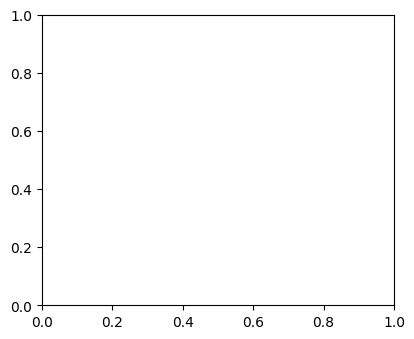

In [20]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data['self_employed'], hue = data['treatment'])
plt.title("Employment Type")

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Family History')

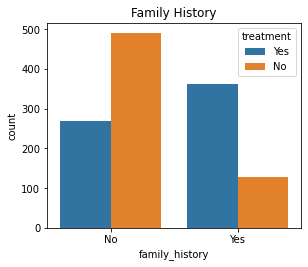

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sb.countplot(data['family_history'], hue = data['treatment'])
plt.title("Family History")

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Work Interference')

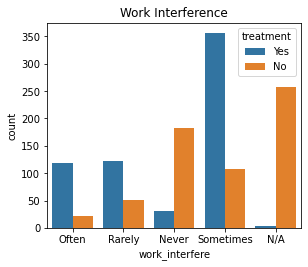

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,3)
sb.countplot(data['work_interfere'], hue = data['treatment'])
plt.title("Work Interference")

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Work Type')

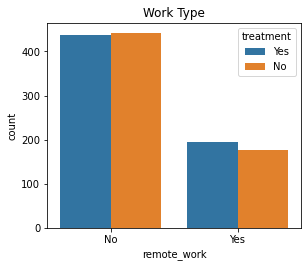

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,4)
sb.countplot(data['remote_work'], hue = data['treatment'])
plt.title("Work Type")

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Company')

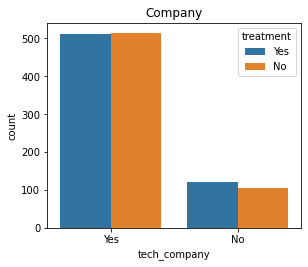

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,5)
sb.countplot(data['tech_company'], hue = data['treatment'])
plt.title("Company")

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Benefits')

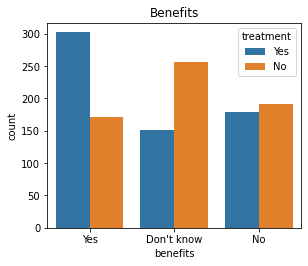

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,6)
sb.countplot(data['benefits'], hue = data['treatment'])
plt.title("Benefits")

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Care Options')

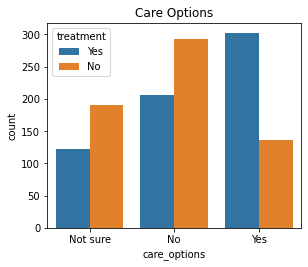

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,7)
sb.countplot(data['care_options'], hue = data['treatment'])
plt.title("Care Options")

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Importance of Mental & Physical Health')

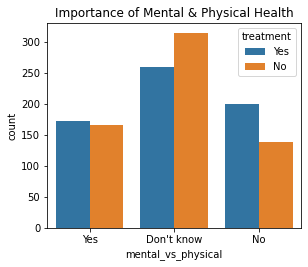

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(data['mental_vs_physical'], hue = data['treatment'])
plt.title("Importance of Mental & Physical Health")

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Wellness Program')

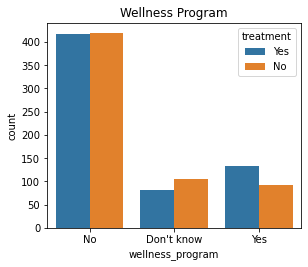

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,9)
sb.countplot(data['wellness_program'], hue = data['treatment'])
plt.title("Wellness Program")

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Anonymity')

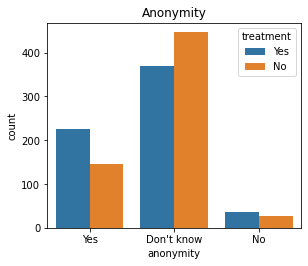

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,10)
sb.countplot(data['anonymity'], hue = data['treatment'])
plt.title("Anonymity")

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Leave')

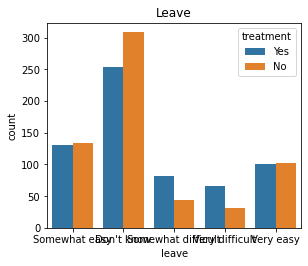

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,11)
sb.countplot(data['leave'], hue = data['treatment'])
plt.title("Leave")

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mental Health Consequence')

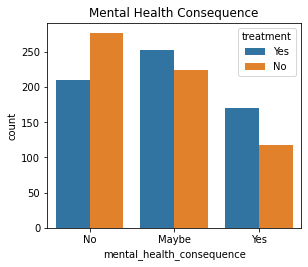

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,12)
sb.countplot(data['mental_health_consequence'], hue = data['treatment'])
plt.title("Mental Health Consequence")

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Physical Health Consequence')

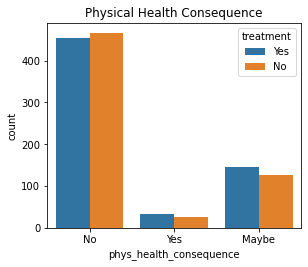

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,13)
sb.countplot(data['phys_health_consequence'], hue = data['treatment'])
plt.title("Physical Health Consequence")

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discussion with Coworkers')

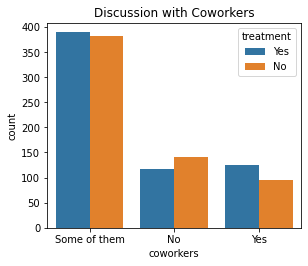

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,14)
sb.countplot(data['coworkers'], hue = data['treatment'])
plt.title("Discussion with Coworkers")

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discussion with Supervisor')

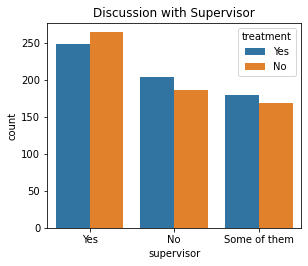

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,15)
sb.countplot(data['supervisor'], hue = data['treatment'])
plt.title("Discussion with Supervisor")

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discussion with Interviewer')

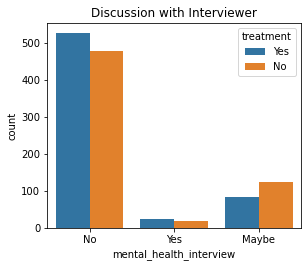

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,16)
sb.countplot(data['mental_health_interview'], hue = data['treatment'])
plt.title("Discussion with Interviewer")

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discussion with Interviewer')

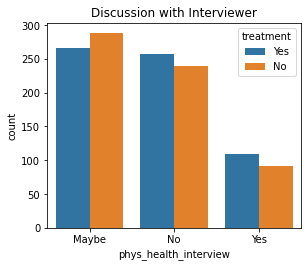

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,17)
sb.countplot(data['phys_health_interview'], hue = data['treatment'])
plt.title("Discussion with Interviewer")

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Consequence After Disclosure')

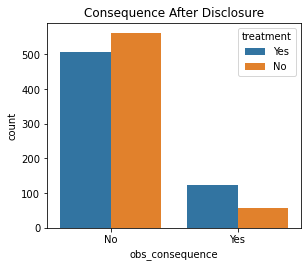

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,18)
sb.countplot(data['obs_consequence'], hue = data['treatment'])
plt.title("Consequence After Disclosure")

In [ ]:
data.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1251.000000,1251,1251,1251,1251,1251,1251,1251,1251,1251,...,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251
unique,NaN,3,2,2,2,5,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,987,1109,762,632,464,289,880,1025,473,...,815,561,487,920,771,512,1003,555,574,1070
mean,32.076739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.288272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
x = data.drop('treatment', axis = 1)
y = data['treatment']

In [22]:
from sklearn. compose import ColumnTransformer
from sklearn. preprocessing import LabelEncoder, OrdinalEncoder

In [23]:
x = data.drop('treatment', axis = 1)
y = data['treatment']
x

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Often,6-25,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,Rarely,More than 1000,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,Rarely,6-25,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Often,26-100,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,Never,100-500,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,No,No,N/A,26-100,No,Yes,No,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Often,26-100,Yes,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,No,No,N/A,100-500,Yes,Yes,No,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [24]:
ct = ColumnTransformer([('oe', OrdinalEncoder(),['Gender','self_employed','family_history','work_interfere','no_employees',
                        'remote_work','tech_company','benefits','care_options','wellness_program', 'seek_help', 'anonymity',
                        'leave','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview',
                        'phys_health_interview','mental_vs_physical', 'obs_consequence'])], remainder = 'passthrough')

In [25]:
x = ct.fit_transform(x)

In [26]:
le = LabelEncoder()
y = le.fit_transform(y)

In [27]:
import joblib
joblib.dump(ct, 'feature_values')

['feature_values']

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 49)
x_test

array([[ 1.,  0.,  0., ...,  1.,  0., 32.],
       [ 1.,  0.,  1., ...,  0.,  0., 37.],
       [ 1.,  0.,  0., ...,  1.,  1., 43.],
       ...,
       [ 1.,  0.,  0., ...,  2.,  0., 24.],
       [ 1.,  0.,  1., ...,  0.,  0., 39.],
       [ 0.,  0.,  1., ...,  1.,  0., 26.]])

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((875, 22), (376, 22), (875,), (376,))

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc
from xgboost.sklearn import XGBClassifier

In [30]:
model_dict = {}

model_dict['Logistic Regression'] = LogisticRegression(solver='liblinear', random_state=49)
model_dict['KNN Classifier'] = KNeighborsClassifier()
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier(random_state=49)
model_dict['Random Forest Classifier'] = RandomForestClassifier(random_state=49)
model_dict['AdaBoost Classifier'] = AdaBoostClassifier(random_state=49)
model_dict['Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=49)
model_dict['XGB Classifier'] = XGBClassifier(random_state=49)

In [ ]:
def model_test(x_train,y_train,x_test,y_test,model,model_name):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("========{}========".format(model_name))
    print("Score is: {}".format(accuracy))
    print()

In [ ]:
for model_name, model in model_dict.items():
    model_test(x_train,y_train,x_test,y_test,model,model_name)

========Logistic Regression========
Score is: 0.8457446808510638

========KNN Classifier========
Score is: 0.7606382978723404

========Decision Tree Classifier========
Score is: 0.7553191489361702

========Random Forest Classifier========
Score is: 0.8271276595744681

========AdaBoost Classifier========
Score is: 0.851063829787234

========Gradient Boosting Classifier========
Score is: 0.851063829787234

========XGB Classifier========
Score is: 0.8111702127659575



In [31]:
res = AdaBoostClassifier(random_state=99)
res.fit(x_train,y_train)
pred_res = res.predict(x_test)
print("Accuracy of AdaBoost:", accuracy_score(y_test,pred_res))
print(pred_res)

Accuracy of AdaBoost: 0.851063829787234
[0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0
 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0
 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1
 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1
 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0
 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1
 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1
 1 1 1 0 1 0]


In [32]:
from sklearn.model_selection import RandomizedSearchCV
params_res = {'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 50, num = 15)],
              'learning_rate':[(0.97+x/100) for x in range(0,8)]}
res_random = RandomizedSearchCV(random_state = 49,estimator = res,param_distributions = params_res,n_iter=50,cv=5,n_jobs=-1)

In [33]:
params_res

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [34]:
res_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [35]:
res_random.best_params_

{'n_estimators': 4, 'learning_rate': 1.0}

In [36]:
res_tuned = AdaBoostClassifier(random_state = 49,n_estimators=11,learning_rate=1.02)
res_tuned.fit(x_train,y_train)
print(x_test)
pred_res_tuned = res_tuned.predict(fx_test)
print("Accuracy of AdaBoost(tuned): ",accuracy_score(y_test,pred_res_tuned))
# print(pred_res_tuned)

[[ 1.  0.  0. ...  1.  0. 32.]
 [ 1.  0.  1. ...  0.  0. 37.]
 [ 1.  0.  0. ...  1.  1. 43.]
 ...
 [ 1.  0.  0. ...  2.  0. 24.]
 [ 1.  0.  1. ...  0.  0. 39.]
 [ 0.  0.  1. ...  1.  0. 26.]]


ValueError: Found input variables with inconsistent numbers of samples: [376, 1]

In [39]:
import pickle
# features = np.array([x])
model=pickle.load(open('model.pkl','rb'))
prediction = model.predict(x)
for i in range(len(prediction)):
    print(prediction[i],y[i])

1 1
0 0
1 0
1 1
0 0
1 0
1 1
0 0
1 1
0 0
0 1
0 0
1 1
0 0
0 0
1 1
1 1
1 1
1 0
0 0
1 1
0 0
1 1
0 1
1 1
1 1
0 0
1 1
0 1
0 0
0 0
1 0
1 1
1 1
1 1
1 1
0 0
0 0
0 0
1 1
0 1
0 0
1 1
1 0
0 1
1 1
0 0
0 0
1 0
1 1
1 1
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
1 1
1 1
1 1
0 0
0 0
0 0
1 0
1 1
1 0
0 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
1 0
1 1
0 0
1 0
0 0
0 0
1 1
0 0
0 0
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 0
1 1
0 0
1 0
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
1 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 0
0 0
0 0
1 0
1 0
1 1
0 0
0 0
0 0
1 1
1 0
0 1
0 0
0 0
1 1
1 0
0 1
1 1
1 0
0 0
0 0
0 1
0 0
0 0
1 1
0 0
0 0
1 1
1 1
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
0 0
1 0
1 1
0 0
0 0
0 0
1 0
1 0
1 1
1 1
0 1
0 0
1 1
0 0
0 0
1 1
1 1
0 0
0 0
1 0
0 0
0 1
1 1
0 0
0 0
0 0
0 0
0 1
1 1
1 1
0 0
1 1
1 0
0 0
0 0
1 0
0 0
1 1
1 1
1 1
1 1
1 0
0 0
1 1
1 1
1 1
0 0
0 0
0 0
1 0
1 1
1 1
1 1
1 1
1 1
0 0
0 1
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1 0
0 0
0 0
1 1
1 1
1 1
0 1
1 0
0 0
0 0
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 0
0 0
1 1
1 1
0 0
1 1
1 1
1 1


Text(33.0, 0.5, 'Actual')

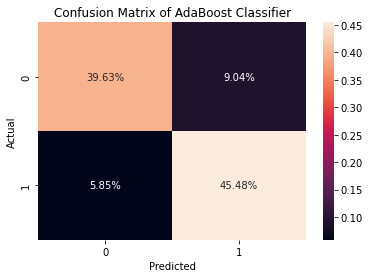

In [ ]:
cf_matrix = confusion_matrix(y_test, pred_res)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

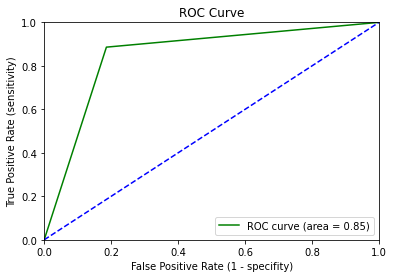

(array([0.        , 0.18579235, 1.        ]),
 array([0.        , 0.88601036, 1.        ]),
 array([2, 1, 0]))

In [ ]:
from sklearn import metrics
fpr_res,tpr_res,thresholds_res = roc_curve(y_test,pred_res)
roc_auc_res = metrics.auc(fpr_res, tpr_res)
plt.plot(fpr_res, tpr_res,color='green', label='ROC curve (area = %0.2f)' % roc_auc_res)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - specifity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test,pred_res)

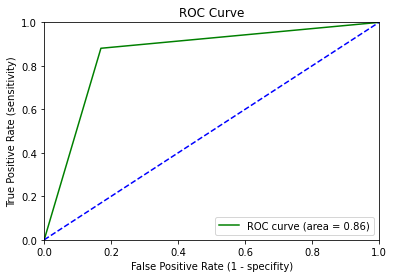

(array([0.        , 0.16939891, 1.        ]),
 array([0.        , 0.88082902, 1.        ]),
 array([2, 1, 0]))

In [ ]:
from sklearn import metrics
fpr_res_tuned,tpr_res_tuned,thresholds_res_tuned = roc_curve(y_test,pred_res_tuned)
roc_auc_res_tuned = metrics.auc(fpr_res_tuned, tpr_res_tuned)
plt.plot(fpr_res_tuned, tpr_res_tuned,color='green', label='ROC curve (area = %0.2f)' % roc_auc_res_tuned)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - specifity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test,pred_res_tuned)

In [ ]:
print(classification_report(y_test,pred_res))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       183
           1       0.83      0.89      0.86       193

    accuracy                           0.85       376
   macro avg       0.85      0.85      0.85       376
weighted avg       0.85      0.85      0.85       376



In [ ]:
print(classification_report(y_test,pred_res_tuned))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       183
           1       0.85      0.88      0.86       193

    accuracy                           0.86       376
   macro avg       0.86      0.86      0.86       376
weighted avg       0.86      0.86      0.86       376



In [ ]:
import pickle
pickle.dump(res_tuned,open('model.pkl','wb'))


In [ ]:
features = np.array([data.iloc[0]])
prediction = knn.predict(features)
print("Prediction: {}".format(prediction))

In [ ]:
x

array([[ 0.,  0.,  0., ...,  2.,  0., 37.],
       [ 1.,  0.,  0., ...,  0.,  0., 44.],
       [ 1.,  0.,  0., ...,  1.,  0., 32.],
       ...,
       [ 1.,  0.,  1., ...,  1.,  0., 34.],
       [ 0.,  0.,  0., ...,  1.,  0., 46.],
       [ 1.,  0.,  1., ...,  0.,  0., 25.]])